Supervised KNN
let the csv posses this fileee

In [26]:
import pandas as pd

df = pd.read_csv("sleep and psychological effects.csv")
print (df.info())
print (df.isna().sum())
print (df.describe())
print (df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     65 non-null     int64 
 1   Age                         65 non-null     int64 
 2   Gender                      65 non-null     object
 3   Favorite_Book_Genre         65 non-null     object
 4   Weekly_Reading_Time(hours)  65 non-null     int64 
 5   Mood_Impact                 65 non-null     object
dtypes: int64(3), object(3)
memory usage: 3.2+ KB
None
User_ID                       0
Age                           0
Gender                        0
Favorite_Book_Genre           0
Weekly_Reading_Time(hours)    0
Mood_Impact                   0
dtype: int64
        User_ID        Age  Weekly_Reading_Time(hours)
count  65.00000  65.000000                   65.000000
mean   33.00000  33.000000                    4.646154
std    18.90767   9.42901

lets check the outliers

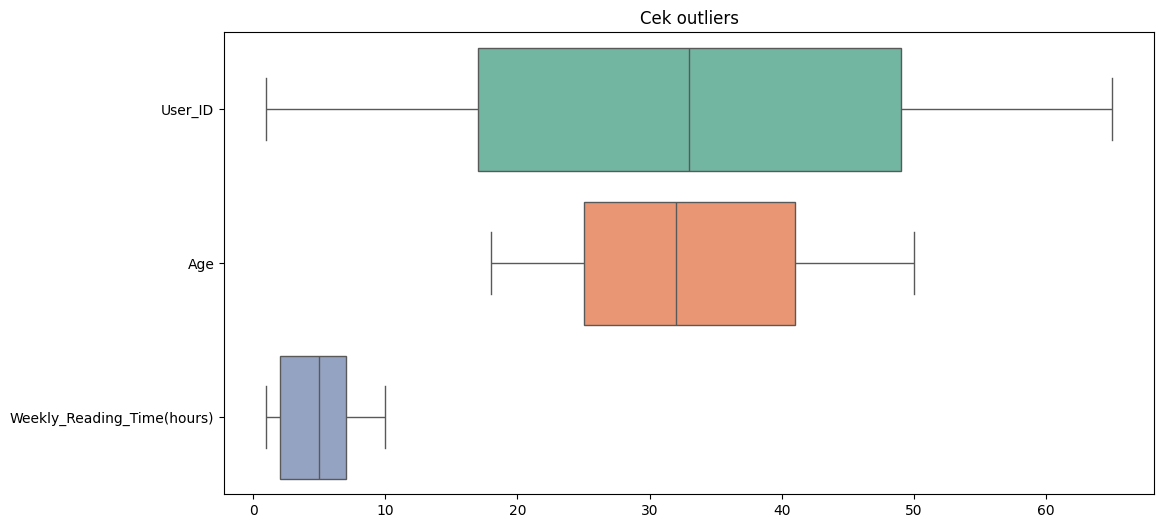

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data = df, orient="h", palette="Set2")
plt.title("Cek outliers")
plt.show()

i forgot to encode the rest.. well lets learn how to encode... here i will use one hot encoding for the genre, and label encode for gender and mood impact

now i will see the genre first.. here i use unique for sort all the genre without loop
then i use value_counts to sum all the genre based on their uniques hehe

In [28]:
print (df["Favorite_Book_Genre"].unique())
print (df["Favorite_Book_Genre"].value_counts())
print (df)

['Fiction' 'Science' 'Romance' 'History' 'Fantasy' 'Biography' 'Self-Help']
Favorite_Book_Genre
Fiction      11
Fantasy      11
Science      10
Self-Help    10
Romance       9
Biography     8
History       6
Name: count, dtype: int64
    User_ID  Age Gender Favorite_Book_Genre  Weekly_Reading_Time(hours)  \
0         1   24      f             Fiction                           6   
1         2   32      m             Science                           2   
2         3   18      f             Romance                           8   
3         4   45      m             History                           3   
4         5   29      f             Fantasy                          10   
..      ...  ...    ...                 ...                         ...   
60       61   35      f             Romance                           8   
61       62   20      m             Fantasy                           9   
62       63   33      f             Science                           1   
63       64   30

why my book genre is still number i already command it

In [29]:
print (df)

    User_ID  Age Gender Favorite_Book_Genre  Weekly_Reading_Time(hours)  \
0         1   24      f             Fiction                           6   
1         2   32      m             Science                           2   
2         3   18      f             Romance                           8   
3         4   45      m             History                           3   
4         5   29      f             Fantasy                          10   
..      ...  ...    ...                 ...                         ...   
60       61   35      f             Romance                           8   
61       62   20      m             Fantasy                           9   
62       63   33      f             Science                           1   
63       64   30      m           Self-Help                           6   
64       65   44      f             History                           3   

   Mood_Impact  
0     Positive  
1      Neutral  
2     Positive  
3      Neutral  
4     Positive

you know? i ask chat gpt to encode it with tensorflow... which i just ever heard of it but i havent ever use it before... so maybe yea... you got special treatment genre

In [30]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# df["Favorite_Book_Genre"] = label_encoder.fit_transform(df["Favorite_Book_Genre"])
# print(df["Favorite_Book_Genre"])

here we goo tensorfloww

In [31]:
# import ten


alr maybe later i cant install it

i will use one hot encoding even it will add 7 columns.. but i need time to mark new file

In [32]:
from datetime import datetime
current_time = datetime.now().strftime("%Y-%m-%d_%H-$M-%S")

print (df)
print ("--------------------------------------------------------")

df_for_genre = df[["Favorite_Book_Genre"]]

df_encoded_genre = pd.get_dummies(df_for_genre, columns=["Favorite_Book_Genre"],prefix="Genre").astype(bool)
df_encoded_number_plss = df_encoded_genre.astype(int)
print (df_encoded_number_plss)

# df = pd.concat([df, df_encoded_genre], axis=1)
# # df.drop(columns=["Favorite_Book_Genre"], inplace=True)
df_encoded_number_plss = df_encoded_number_plss.loc [:, ~df_encoded_number_plss.columns.duplicated()]
# # df_smile = df.drop(columns=["User_Id", "Age", "Gender","Weekly_Reading_Time(Hours)", "Mood_Impact"] )
# # df_smile = df_smile.astype(int)
df_clean_final = pd.concat([df, df_encoded_number_plss], axis=1)
df_clean_finally = df_clean_final.drop(columns=["Favorite_Book_Genre"])
df_clean_finally.to_csv(f"ENDAll_EncodedBookGenre{current_time}.csv", index= False)
print ("--------------------------------------------------------")
print (df_clean_final)



    User_ID  Age Gender Favorite_Book_Genre  Weekly_Reading_Time(hours)  \
0         1   24      f             Fiction                           6   
1         2   32      m             Science                           2   
2         3   18      f             Romance                           8   
3         4   45      m             History                           3   
4         5   29      f             Fantasy                          10   
..      ...  ...    ...                 ...                         ...   
60       61   35      f             Romance                           8   
61       62   20      m             Fantasy                           9   
62       63   33      f             Science                           1   
63       64   30      m           Self-Help                           6   
64       65   44      f             History                           3   

   Mood_Impact  
0     Positive  
1      Neutral  
2     Positive  
3      Neutral  
4     Positive

i think its done like that, after this we gonna convert the gender and mood impact... this one i will use label encoding bcs in gender, male and female arent same... we only use one hot encoding (dummies) to category or something arent ordinal... but this one i mean if you male or female are effectting the target.. either the mood impact


edit : alhamdulillah

i will use df now

In [33]:
from sklearn.preprocessing import LabelEncoder

df = df_clean_finally

encoder = LabelEncoder()
df["Gender"] = encoder.fit_transform(df["Gender"])
df["Mood_Impact"] = encoder.fit_transform(df["Mood_Impact"])

print (df["Gender"])
print ("--------------------------------------")
print (df["Mood_Impact"])
print ("--------------------------------------")
print (df)

0     0
1     1
2     0
3     1
4     0
     ..
60    0
61    1
62    0
63    1
64    0
Name: Gender, Length: 65, dtype: int64
--------------------------------------
0     2
1     1
2     2
3     1
4     2
     ..
60    2
61    2
62    0
63    2
64    1
Name: Mood_Impact, Length: 65, dtype: int64
--------------------------------------
    User_ID  Age  Gender  Weekly_Reading_Time(hours)  Mood_Impact  \
0         1   24       0                           6            2   
1         2   32       1                           2            1   
2         3   18       0                           8            2   
3         4   45       1                           3            1   
4         5   29       0                          10            2   
..      ...  ...     ...                         ...          ...   
60       61   35       0                           8            2   
61       62   20       1                           9            2   
62       63   33       0                  

alr done we got female = 0 and male = 1, also in mood we got positive = 2, neutral = 1, and negative is 0

edit : alr done

lets normalized

In [34]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

df = pd.read_csv("ENDAll_EncodedBookGenre2025-01-16_18-$M-52.csv")

scaler = StandardScaler()
need_to_scale = df[["Age","Weekly_Reading_Time(hours)"]]
df_normalized = scaler.fit_transform(need_to_scale)

df_normalized = pd.DataFrame(df_normalized, columns=need_to_scale.columns)
# df_normalized = pd.concat([df.drop(columns=need_to_scale),df_normalized])
df["Age"] = df_normalized["Age"]
df["Weekly_Reading_Time(hours)"] = df_normalized["Weekly_Reading_Time(hours)"]
print (df)
df.to_csv(f"ScaledAgeanndHours {current_time}.csv", index=False)

    User_ID       Age  Gender  Weekly_Reading_Time(hours)  Mood_Impact  \
0         1 -0.961929       0                    0.501948            2   
1         2 -0.106881       1                   -0.981081            1   
2         3 -1.603215       0                    1.243463            2   
3         4  1.282572       1                   -0.610324            1   
4         5 -0.427524       0                    1.984977            2   
..      ...       ...     ...                         ...          ...   
60       61  0.213762       0                    1.243463            2   
61       62 -1.389453       1                    1.614220            2   
62       63  0.000000       0                   -1.351838            0   
63       64 -0.320643       1                    0.501948            2   
64       65  1.175691       0                   -0.610324            1   

    Genre_Biography  Genre_Fantasy  Genre_Fiction  Genre_History  \
0                 0              0         

Done

first seperate the target and the features

In [35]:
X = df.drop(columns=["Mood_Impact","User_ID"])
y = df[["Mood_Impact"]]

then split the data

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.12, random_state=43)

then we normalize the data with scaler.. the age and the hours

edit : i will normalized after the encode

In [37]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# need_to_scale = X.drop(columns=["Gender","Favorite_Book_Genre"])

# df_normalized = scaler.fit_transform(need_to_scale)
# df_normalized = pd.DataFrame(df_normalized, columns=need_to_scale.columns)
# df_normalized["Gender"] = X["Gender"]

# X_train,X_test = train_test_split(df_normalized, test_size=0.12, random_state=43)

# print (X_train)
# print (df["Favorite_Book_Genre"]



make the model

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report
y_pred = knn.predict(X_test)

def Your_Age():
    try:
        age = int(input("What is your age? "))
        print (f"Your age is {age} old ")
        return age
    except ValueError:
        print ("Please only number... try again...")
        return Your_Age()
    
def Your_Gender():
    gender = input("What is your gender? male or female? ")
    if gender in ["Male", "m", "male", "M"]:
        print ("Your Gender is Male")
        return 1
    elif gender in ["Female", "female", "f", "F"] :
        print ("Your Gender is Female")
        return 0
    else :
        print ("We only have 2 gender which is male and female... please try again...")
        return Your_Gender()
    
def Your_Weekly_Reading_Time():
    try :
        time = int(input("How much your time in hours in this week? "))
        print (f"Your Weekly Reading Time in Hours is {time} Hours")
        return time
    except ValueError:
        print ("Just put the number of your hourly reading... please try again")
        return Your_Weekly_Reading_Time()

def Your_Books_Genre() :
    mapping = {
        "Fiction"      : [0,	0,	1,	0,	0,	0,	0],
        "fiction"       : [0,	0,	1,	0,	0,	0,	0],
        "Biography"  : [1,   0,	0,	0,	0,	0,	0],
        "biography" : [1,   0,	0,	0,	0,	0,	0],
        "Fantasy"     : [0,	1,	0,	0,	0,	0,	0],
        "fantasy" : [0,	1,	0,	0,	0,	0,	0],
        "History" : [0,	0,	0,	1,	0,	0,	0],
        "history"      : [0,	0,	0,	1,	0,	0,	0],
        "Romance"      : [0,	0,	0,	0,	1,	0,	0],
        "romance" : [0,	0,	0,	0,	1,	0,	0],
        "Science"     : [0,	0,	0,	0,	0,	1,	0],
        "science" : [0,	0,	0,	0,	0,	1,	0],
        "Self-Help"  : [0,	0,	0,	0,	0,	0,	1],
        "self-help"  : [0,	0,	0,	0,	0,	0,	1]
    }
    try :
        genre = input("Your Book Genre? (Fiction, Biography, Fantasy, History, Romance, Science, Self-Help)? ")
        if genre in mapping : 
            one_hot_user = mapping[genre]
            print (f"Your Genre Book is {genre} which is {one_hot_user}")
            return one_hot_user
        else :
            print ("Please input avaliable category... please try again")
            return Your_Books_Genre()
    except Exception as e : 
        print(f"eror : {e}")
        return Your_Books_Genre()


age = Your_Age()
gender = Your_Gender()
weekly = Your_Weekly_Reading_Time()
genre = Your_Books_Genre()


d:\piton\1sesuatuaja\statistika\.venv\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Your age is 23 old 
Your Gender is Male
Your Weekly Reading Time in Hours is 4 Hours
Your Genre Book is fantasy which is [0, 1, 0, 0, 0, 0, 0]


fyuhh its done the input now.... lets make it a new data

In [43]:
# age = scaler.fit_transform(age)
# weekly = scaler.fit_transform(weekly)

new_data_for_scale = pd.DataFrame({
    'Age' : [age],
    'Weekly_Reading_Time(hours)' : [weekly],

})
new_scaled_data = scaler.transform(new_data_for_scale)
print (new_scaled_data)
print ("-------------------------------------------")

new_data = pd.DataFrame({
    'Age' : [new_scaled_data[0,0]],
    'Gender' : [gender],
    'Weekly_Reading_Time(hours)' : [new_scaled_data[0,1]],
    'Genre_Biography' : [genre[0]],
    'Genre_Fantasy' : [genre[1]],
    'Genre_Fiction' : [genre[2]],
    'Genre_History' : [genre[3]],
    'Genre_Romance' : [genre[4]],
    'Genre_Science' : [genre[5]],
    'Genre_Self-Help' : [genre[6]]
})

print (new_data)

[[-1.06881009 -0.23956624]]
-------------------------------------------
       Age  Gender  Weekly_Reading_Time(hours)  Genre_Biography  \
0 -1.06881       1                   -0.239566                0   

   Genre_Fantasy  Genre_Fiction  Genre_History  Genre_Romance  Genre_Science  \
0              1              0              0              0              0   

   Genre_Self-Help  
0                0  


thanksss GODDD
alr lets scale them again


edit : fohwjojfjhouwej lets goooo

lets predict the mood

In [48]:
predict = knn.predict(new_data)

a = "helo"
if predict == 2 :
    a = "Positive"
elif  predict == 1 :
    a = "Neutral"
else:
    a = "Negative"
print(f"Your Mood Impact is {a}")

Your Mood Impact is Positive
